In [ ]:
# CP1 Statistical_Data_analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import date
from datetime import datetime, timedelta
import seaborn as sns
import gender_guesser.detector as gender

Are there variables that are particularly significant in terms of explaining the answer to your project question?

Are there significant differences between subgroups in your data that may be relevant to your project aim?

Are there strong correlations between pairs of independent variables or between an independent and a dependent variable?

What are the most appropriate tests to use to analyze these relationships?


In [26]:
df1=pd.read_csv ('Amazon.csv')

In [27]:
df=df1.drop(['Date','asin','helpful','reviewTime','reviewerID','summary'],axis=1)

In [28]:
pd.set_option('display.max_colwidth', -1)
df.head(4)

,overall,reviewText,reviewerName
0,2,"I had big expectations because I love English TV, in particular Investigative and detective stuff but this guy is really boring. It didn't appeal to me at all.",AdrianaM
1,5,"I highly recommend this series. It is a must for anyone who is yearning to watch ""grown up"" television. Complex characters and plots to keep one totally involved. Thank you Amazin Prime.",Carol T
2,1,"This one is a real snoozer. Don't believe anything you read or hear, it's awful. I had no idea what the title means. Neither will you.","Daniel Cooper ""dancoopermedia"""
3,4,Mysteries are interesting. The tension between Robson and the tall blond is good but not always believable. She often seemed uncomfortable.,"J. Kaplan ""JJ"""


In [29]:
d = gender.Detector(case_sensitive=False)

first_names = []
for i in range(0,36797):
    name = str(df.reviewerName.values[i]).split(' ', 1)[0]
    first_names.append(name)
    
genders = []
for i in first_names[0:len(first_names)]:
    if d.get_gender(i) == 'male':
        genders.append('male')
    elif d.get_gender(i) == 'mostly_male':
        genders.append('male')
    elif d.get_gender(i) == 'mostly_female':
        genders.append('female')
    elif d.get_gender(i) == 'female':
        genders.append('female')
    else:
        genders.append('unknown')

In [34]:
# df.insert(3, 'genders', genders) 

In [35]:
df.head(3)

,overall,reviewText,reviewerName,genders
0,2,"I had big expectations because I love English TV, in particular Investigative and detective stuff but this guy is really boring. It didn't appeal to me at all.",AdrianaM,unknown
1,5,"I highly recommend this series. It is a must for anyone who is yearning to watch ""grown up"" television. Complex characters and plots to keep one totally involved. Thank you Amazin Prime.",Carol T,female
2,1,"This one is a real snoozer. Don't believe anything you read or hear, it's awful. I had no idea what the title means. Neither will you.","Daniel Cooper ""dancoopermedia""",male


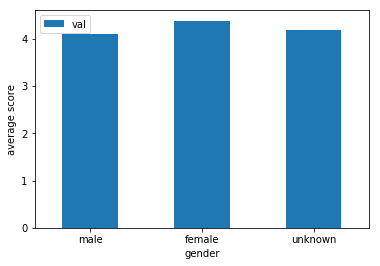

In [36]:
dfbar = pd.DataFrame({'gen':['male', 'female', 'unknown'], 
                      'val':[df[df.genders=='male'].overall.sum()/df[df.genders=='male'].genders.count(), 
                             df[df.genders=='female'].overall.sum()/df[df.genders=='female'].genders.count(), 
                             df[df.genders=='unknown'].overall.sum()/df[df.genders=='unknown'].genders.count()]})
dfbar.plot.bar(x='gen', y='val', rot=0)
plt.xlabel('gender')
plt.ylabel('average score')
plt.show()

In [25]:
# first idea -> the gender make difference
# second idea -> length of text make difference

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36797 entries, 0 to 36796
Data columns (total 4 columns):
overall         36797 non-null int64
reviewText      36797 non-null object
reviewerName    36797 non-null object
genders         36797 non-null object
dtypes: int64(1), object(3)
memory usage: 1.1+ MB


In [40]:
df.index=range(1,36798)

In [43]:
male = df.overall[df.genders == 'male']
female = df.overall[df.genders == 'female']
n_ma = len(male)
n_fe = len(female)

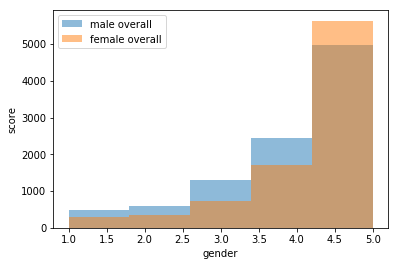

In [45]:
_ = plt.hist(male, bins=5, alpha=0.5, label='male overall')
_ = plt.hist(female, bins=5, alpha=0.5, label='female overall')
_ = plt.xlabel('gender')
_ = plt.ylabel('score')
_ = plt.legend()
plt.show()

In [46]:
np.random.seed(47)
N_rep = 10000

In [47]:
import scipy.stats as stats
stats.f_oneway(male, 
               female)

F_onewayResult(statistic=290.34862540539945, pvalue=1.3014566775902074e-64)